<a href="https://colab.research.google.com/github/Itzz-Hashan/Client-Prediction-System/blob/main/CM2604/CLIENT_PREDICTION_20230657.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# ML Coursework



##Data preproccesing

###Importing libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Separate columns in dataset

In [62]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

new_file = ('new_bank-additional-full.csv')
df.to_csv(new_file,index=False)

print(f"Dataset saved as {new_file}")

Dataset saved as new_bank-additional-full.csv


###Data importing

In [63]:
df = pd.read_csv('new_bank-additional-full.csv')

df.sample(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24098,43,services,married,basic.6y,no,no,no,telephone,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.343,5195.8,no
14182,56,services,divorced,high.school,unknown,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16385,32,services,single,high.school,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
4670,28,admin.,single,high.school,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
17988,30,entrepreneur,single,university.degree,no,no,no,telephone,jul,tue,...,21,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
40847,40,admin.,divorced,high.school,no,yes,yes,telephone,sep,wed,...,1,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,no
31637,29,blue-collar,married,basic.9y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
25078,37,retired,divorced,basic.9y,unknown,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
36713,29,student,single,professional.course,no,no,no,cellular,jun,fri,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no
13637,54,blue-collar,divorced,basic.4y,unknown,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


###Handaling the duplicates data

In [64]:
count=df.duplicated().sum()
print(f"Duplicates-{count}")

Duplicates-12


In [65]:
if count>0:
  duplicates=df[df.duplicated()]
  print(duplicates)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [66]:
df_clean = df.drop_duplicates()
print(f"Dataset without duplicates-{df_clean.shape}")

Dataset without duplicates-(41176, 21)


###removing unwanted columns

In [67]:

df= df_clean.drop(['duration', 'default'], axis=1)
df.sample(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36955,59,blue-collar,divorced,basic.4y,no,no,cellular,jul,thu,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
34735,31,admin.,single,high.school,yes,no,cellular,may,thu,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,yes
14348,34,services,married,high.school,unknown,unknown,cellular,jul,mon,13,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
21770,38,technician,married,professional.course,yes,yes,cellular,aug,wed,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
11731,48,unemployed,married,high.school,yes,no,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
16573,32,technician,married,professional.course,yes,no,cellular,jul,wed,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
25850,44,admin.,single,high.school,yes,no,cellular,nov,wed,1,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
26424,31,entrepreneur,single,high.school,no,no,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
29666,44,blue-collar,married,basic.4y,unknown,unknown,cellular,apr,mon,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
27819,33,admin.,married,university.degree,no,no,cellular,mar,thu,2,999,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no


In [68]:
# prompt: code to check how many number  values ="unknown" in columns

unknown_counts = df.apply(lambda x: x.value_counts().get('unknown', 0))
unknown_counts

,0
age,0
job,330
marital,80
education,1730
housing,990
loan,990
contact,0
month,0
day_of_week,0
campaign,0


###Handling outliers

####Check How many Outliers

In [69]:


import pandas as pd
import numpy as np



def count_outliers(df):

    outlier_counts = {}
    for col in df.select_dtypes(include=np.number):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts


outlier_counts = count_outliers(df)

for col, count in outlier_counts.items():
  print(f"Column '{col}': {count} outliers")

Column 'age': 468 outliers
Column 'campaign': 2406 outliers
Column 'pdays': 1515 outliers
Column 'previous': 5625 outliers
Column 'emp.var.rate': 0 outliers
Column 'cons.price.idx': 0 outliers
Column 'cons.conf.idx': 446 outliers
Column 'euribor3m': 0 outliers
Column 'nr.employed': 0 outliers


####Display outliers in a box plot

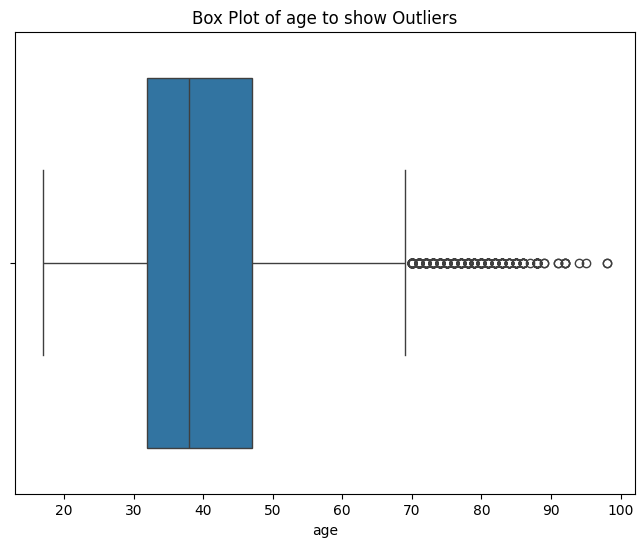

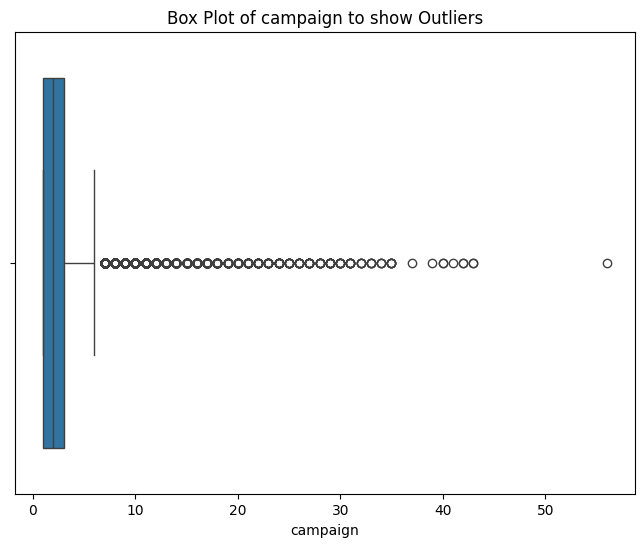

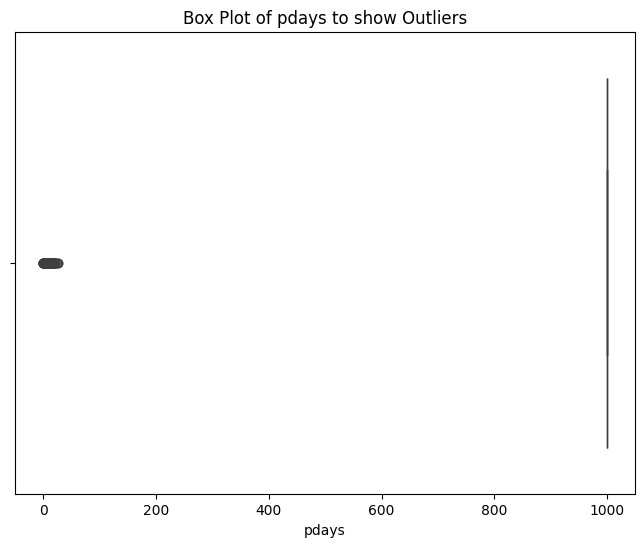

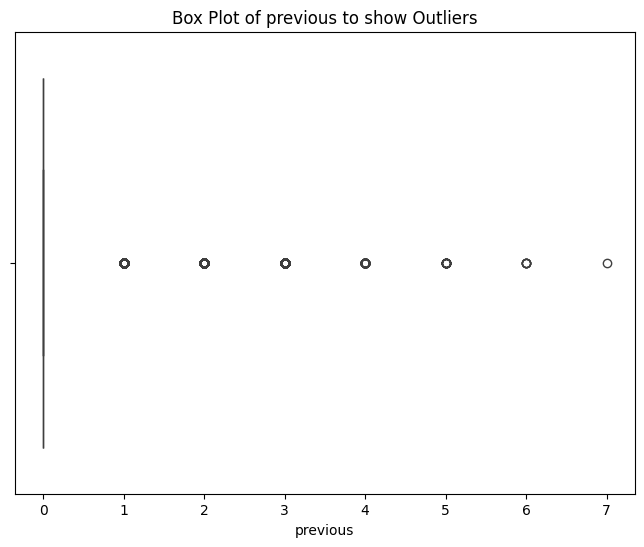

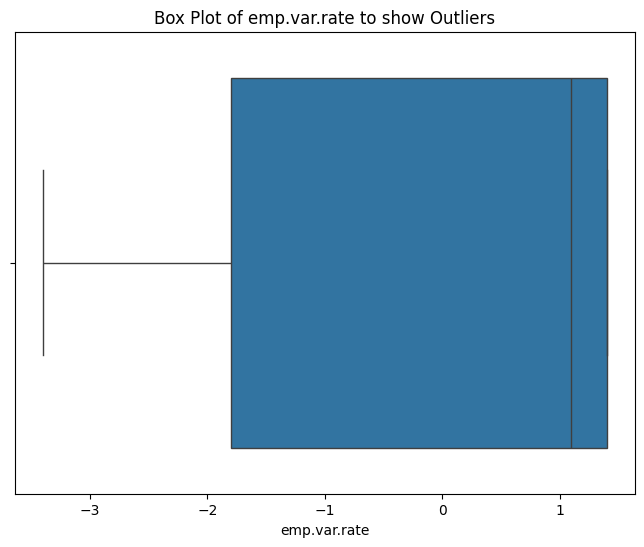

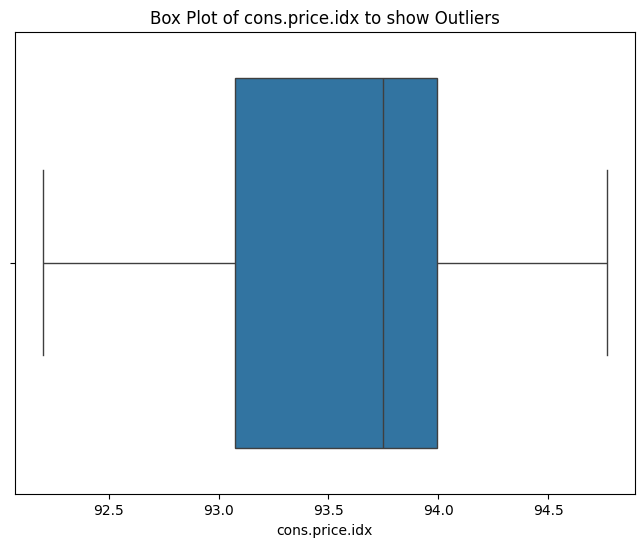

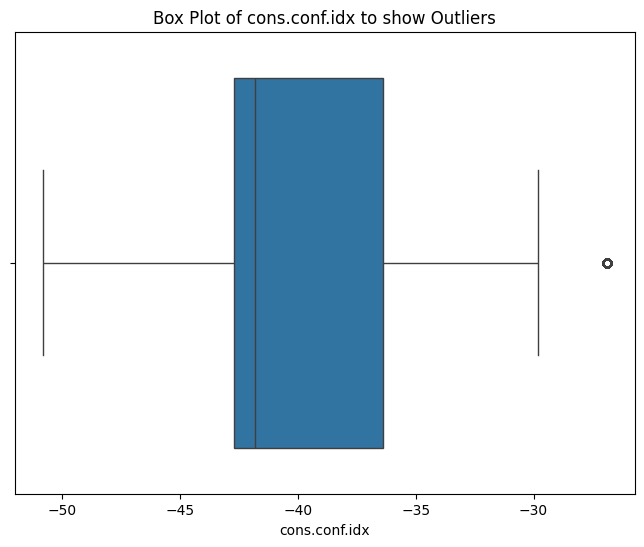

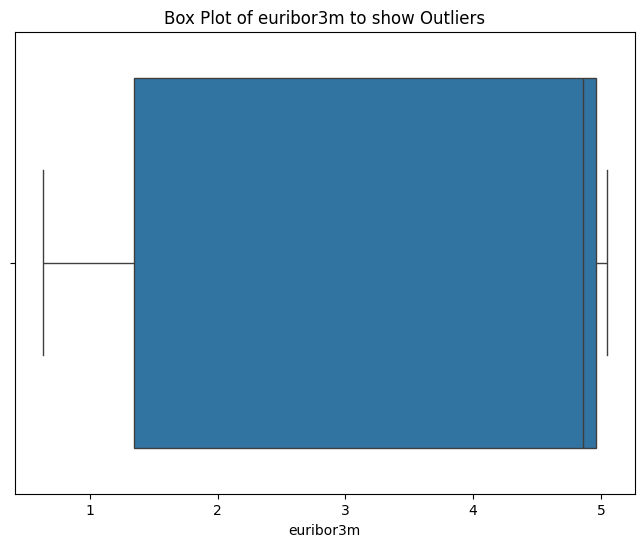

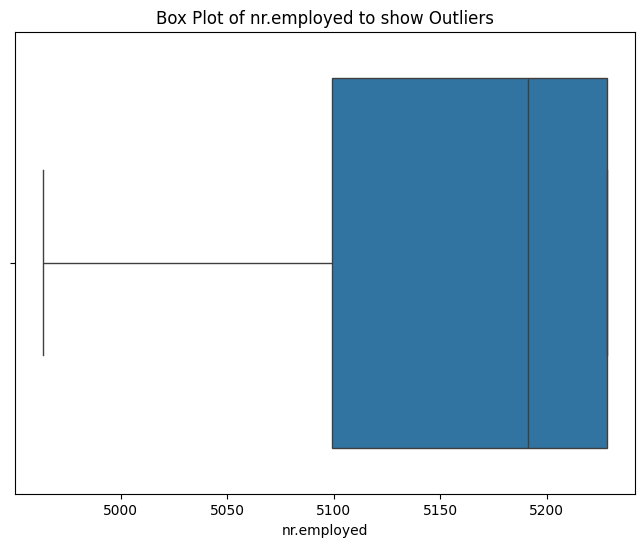

In [70]:


import matplotlib.pyplot as plt
import seaborn as sns




def display_outliers(df):
    for col in df.select_dtypes(include=np.number):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} to show Outliers')
        plt.xlabel(col)
        plt.show()

display_outliers(df)

In [71]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


####Outliers handling

In [72]:


from sklearn.impute import KNNImputer

def handle_outliers_knn(df, columns):


    df_outliers_handled = df.copy()
    imputer = KNNImputer(n_neighbors=5)
    for col in columns:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_outliers_handled[f'{col}_outlier'] = 0
        df_outliers_handled.loc[(df_outliers_handled[col] < lower_bound) | (df_outliers_handled[col] > upper_bound), f'{col}_outlier'] = 1

        df_outliers_handled.loc[(df_outliers_handled[col] < lower_bound) | (df_outliers_handled[col] > upper_bound), col] = np.nan

        df_outliers_handled[col] = imputer.fit_transform(df_outliers_handled[[col]])[:, 0]


        df_outliers_handled = df_outliers_handled.drop(columns=[f'{col}_outlier'])

    return df_outliers_handled



columns_to_handle = ['age', 'campaign', 'cons.conf.idx']
df_handled = handle_outliers_knn(df, columns_to_handle)


print(df_handled.head())

    age        job  marital    education housing loan    contact month  \
0  56.0  housemaid  married     basic.4y      no   no  telephone   may   
1  57.0   services  married  high.school      no   no  telephone   may   
2  37.0   services  married  high.school     yes   no  telephone   may   
3  40.0     admin.  married     basic.6y      no   no  telephone   may   
4  56.0   services  married  high.school      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon       1.0    999         0  nonexistent           1.1   
1         mon       1.0    999         0  nonexistent           1.1   
2         mon       1.0    999         0  nonexistent           1.1   
3         mon       1.0    999         0  nonexistent           1.1   
4         mon       1.0    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1 

In [73]:
print(f"Dataset shape after outlier handling: {df_handled.shape}")

Dataset shape after outlier handling: (41176, 19)


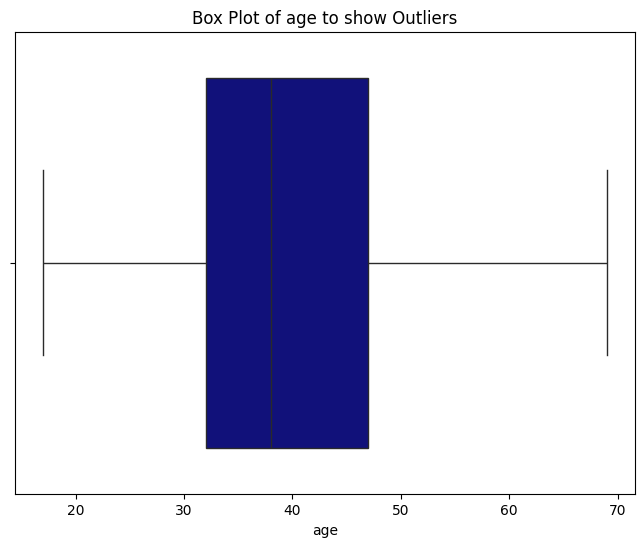

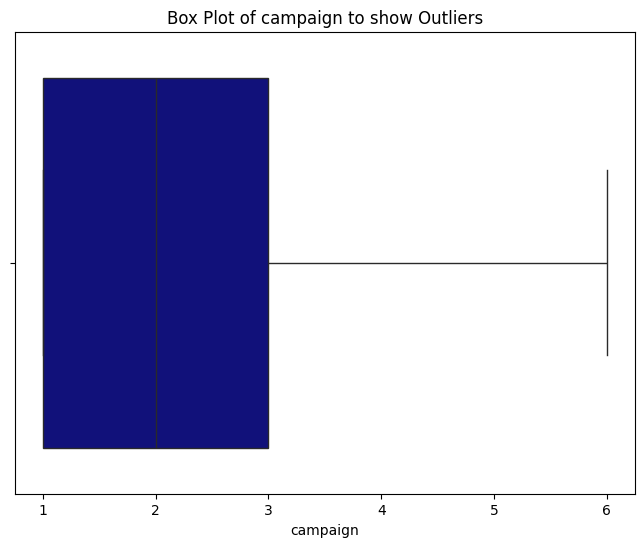

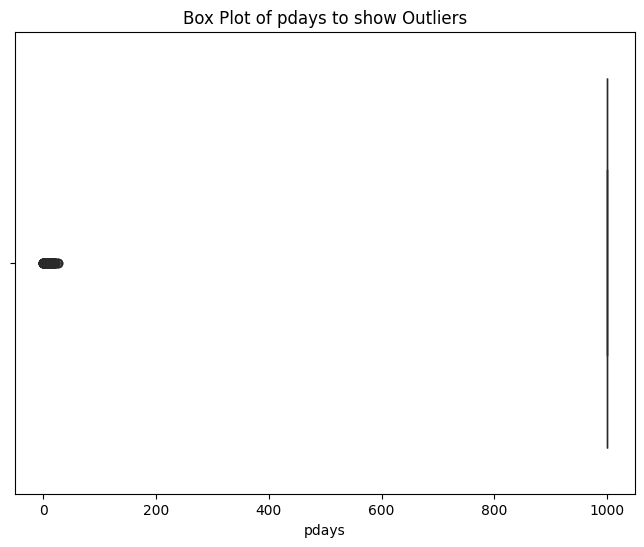

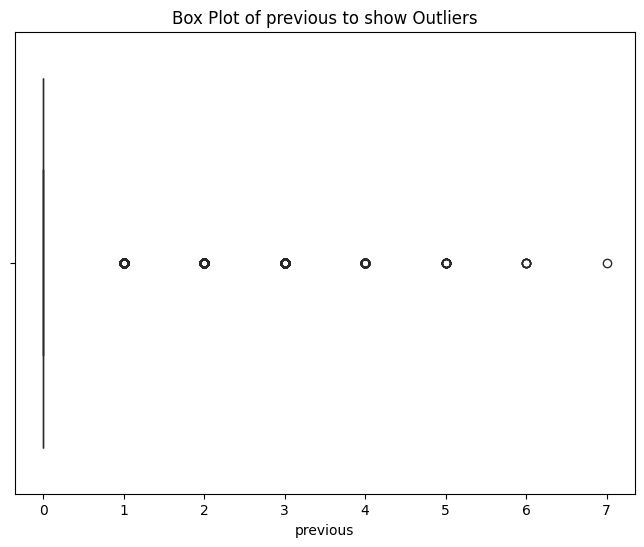

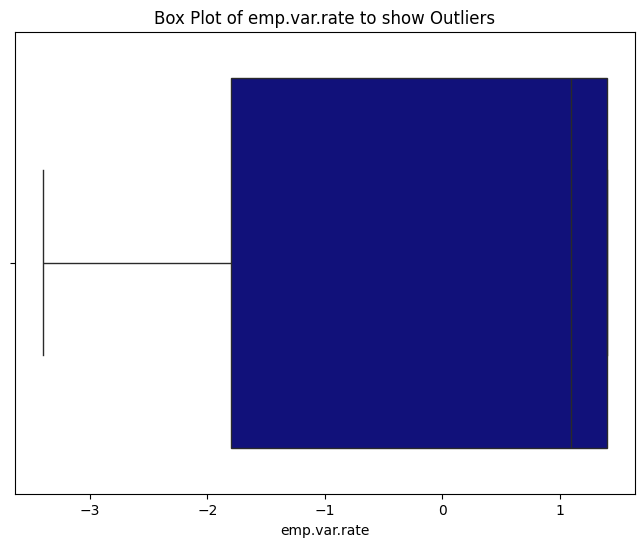

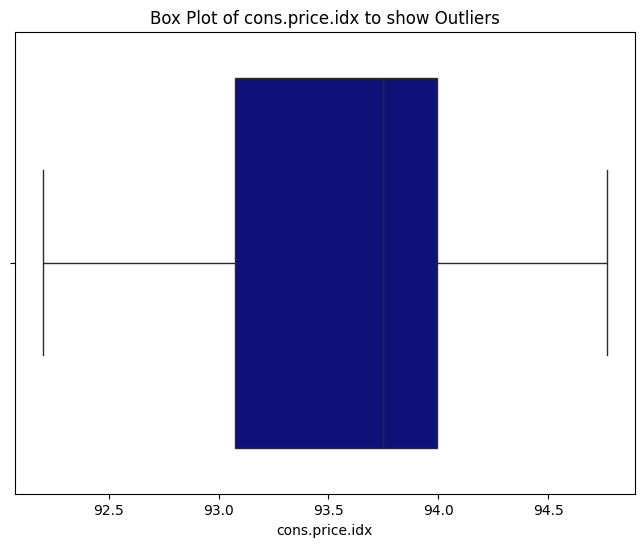

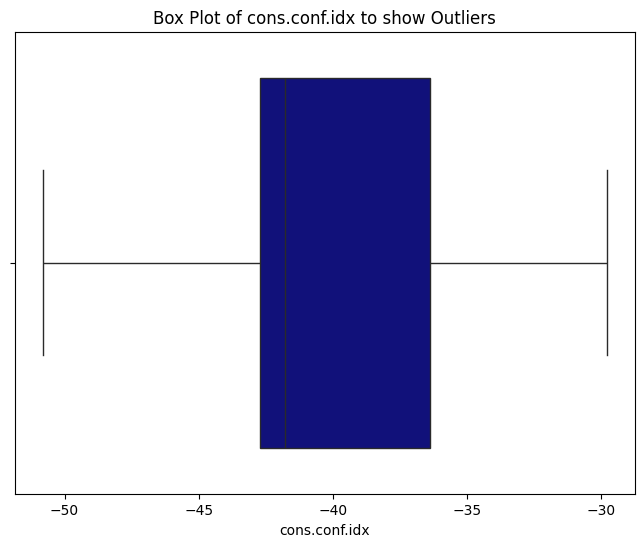

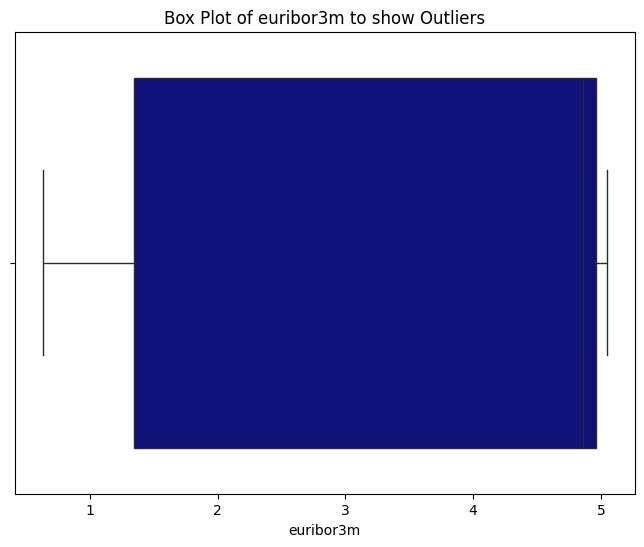

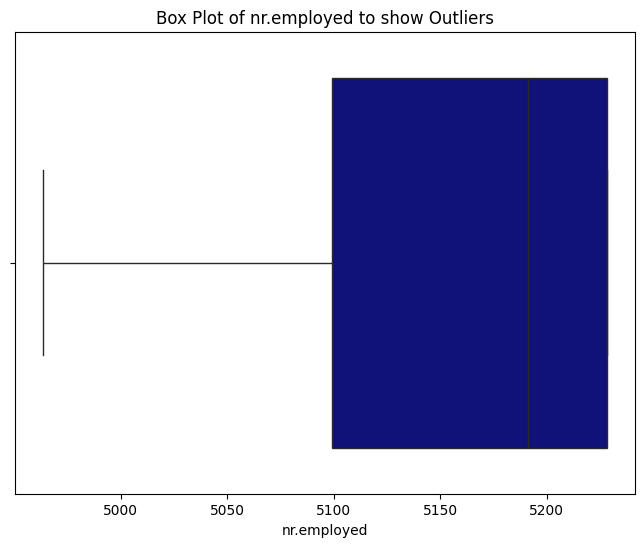

In [74]:
def display_outliers(df):
    for col in df.select_dtypes(include=np.number):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col],color="darkblue")
        plt.title(f'Box Plot of {col} to show Outliers')
        plt.xlabel(col)
        plt.show()

display_outliers(df_handled)

###Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
   df_handled[col] = le.fit_transform(df_handled[col])

df_handled


,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.000000,3,1,0,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57.000000,7,1,3,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37.000000,7,1,3,2,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40.000000,0,1,1,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56.000000,7,1,3,0,2,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,39.599391,5,1,5,2,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.000000,1,1,5,0,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.000000,5,1,6,2,0,0,7,0,2.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.000000,9,1,5,0,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
